Using TensorFlow backend.
/usr/src/app/koda/edge/network.py:66: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  self.model = Model(input = inputs, output = conv10)


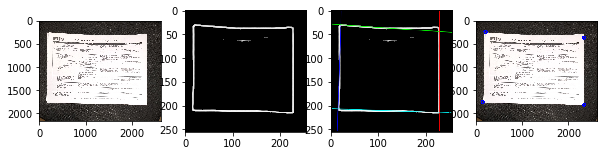

OverflowError: Python int too large to convert to C long

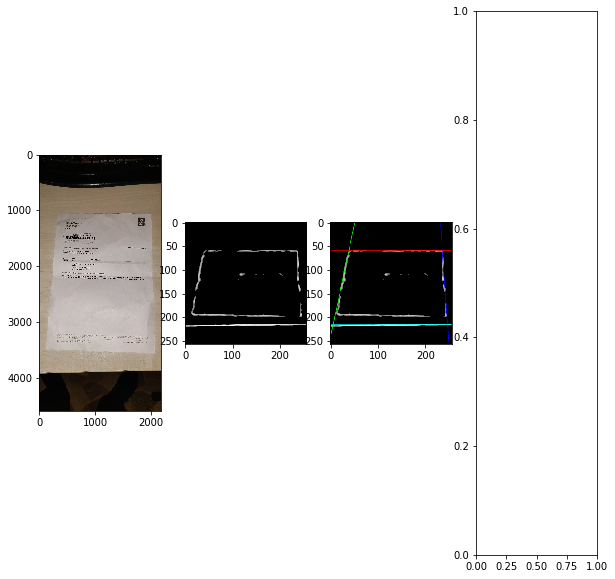

In [1]:
from koda.corners.detector import CornersDetectorByEdges, CornersNotFound
from matplotlib import pyplot as plt
import cv2
import numpy as np
import math
%matplotlib inline

cdetector = CornersDetectorByEdges()

for i in range(7):
    fig, axes = plt.subplots(1, 4, figsize=(10, 10))

    # Load image
    file = 'dataset/IMG_%d.jpg' % i
    img = cv2.imread(file, cv2.IMREAD_COLOR)
    axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  

    # Find corners
    try:
        #corners = cdetector.find_corners(img)
        corners = cdetector.find_corners(img)
    except CornersNotFound as e:
        print(str(e))
        #continue

    # Plot edges detection image
    axes[1].imshow(cv2.cvtColor(cdetector.edges_img, cv2.COLOR_GRAY2RGB))  

    # Plot Hough lines
    im_lines = cv2.cvtColor(cdetector.edges_img.copy(), cv2.COLOR_GRAY2BGR)
    colors = [(255,0,0),(0,255,0),(0,0,255),(255,255,0)]
    for i, line in enumerate(cdetector.hough_lines):
        rho, theta = line
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(im_lines, pt1, pt2, colors[i], 1, cv2.LINE_AA)

    axes[2].imshow(cv2.cvtColor(im_lines, cv2.COLOR_BGR2RGB))

    # Plot corners
    im_corners = img.copy()
    for x,y in corners:
        cv2.circle(im_corners, (x,y), 30, (255, 0, 0), 30)

    axes[3].imshow(cv2.cvtColor(im_corners, cv2.COLOR_BGR2RGB))
    plt.show()